# <center><a href='https://colab.research.google.com/github/cpge-itc/itc1/blob/main/files/5_graph/tp/tp6/tp_dijkstra.ipynb'>TP : Algorithme de Dijkstra <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

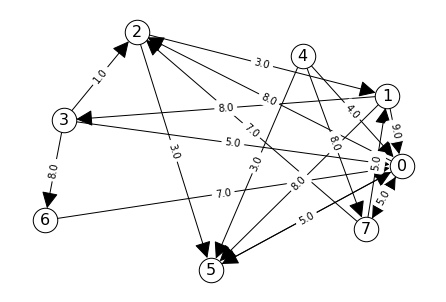

[[inf, inf, 8, inf, inf, 1, inf, 2],
 [9, inf, inf, 8, inf, 8, inf, inf],
 [inf, 3, inf, inf, inf, 3, inf, inf],
 [5, inf, 1, inf, inf, inf, 8, inf],
 [4, inf, inf, inf, inf, 3, inf, 8],
 [5, inf, inf, inf, inf, inf, inf, inf],
 [7, inf, inf, inf, inf, inf, inf, inf],
 [5, 5, 7, inf, inf, inf, inf, inf]]

In [1]:
try:
    __import__("cpge")
except ImportError:
    ! pip install git+https://github.com/fortierq/itc-code
import cpge.graph

G = cpge.graph.random_matrix(weighted=True, directed=True)
cpge.graph.draw(G, weighted=True, directed=True) # dessin
G # matrice d'adjacence pondérée

## Poids

**Exercice** : Écrire une fonction `poids_positifs(G)` vérifiant que tous les poids de `G` (donné par matrice d'adjacence pondérée) sont positifs (ce qui est la condition pour utiliser l'algorithme de Dijkstra).  
Tester que le résultat est `True` avec le graphe aléatoire généré ci-dessus (dont tous les poids sont positifs) puis que le résultat est `False` après avoir rendu une arête négative.

**Exercice** : Écrire une fonction `cycle_negatif(C, G)` déterminant si `C` est la liste des sommets d'un cycle de poids négatif. Tester avec une matrice d'adjacence construite à la main.

## File de priorité

On rappelle qu'une file de priorité `q` permet de stocker un ensemble de valeurs avec des opérations :
- `q.add(e, p)` : ajoute `e` à `q`, avec la priorité `p`.  
- `q.take_min()` : supprime et renvoie l'élément de `q` dont la priorité est minimum.
- `q.update(e, p)` : met à jour la priorité de `e` dans `q` en la remplaçant par `p`.
- `q.is_empty()` : détermine si `q` est vide.


**Exercice** : Deviner ce que renvoie chaque `take_min` dans les instructions suivantes et vérifier en l'exécutant.  
```python
from cpge import PriorityQueue

q = PriorityQueue() # file de priorité vide
q.add(0, 6)
q.add(1, 3)
q.add(2, 5)
q.take_min()
q.update(0, 2)
q.take_min()
q.add(3, 7)
q.take_min()
```

## Algorithme de Dijkstra

**Exercice** : Compléter la fonction suivante pour implémenter l'algorithme de Dijkstra permettant de trouver les distances de $s$ aux autres sommets de $G$.  
Vérifier sur un exemple.

In [5]:
from cpge import PriorityQueue

def dijkstra(G, s):
    n = ... # nombre de sommets de G
    dist = ... # créer une liste de taille n remplie de float("inf")
    dist[s] = 0
    q = PriorityQueue()
    # ajouter chaque sommet v de G à q, avec comme priorité dist[v]
    while ...: # tant que q n'est pas vide
        u = ... # extraire de q le sommet de priorité minimum
        for v in range(n): # pour chaque voisin de u
            d = dist[u] + G[u][v]
            if v in q and ...: # si d < dist[v]
                ... # mettre à jour dist[v] et la priorité de v
    return dist

## Exercices LeetCode

**Exercice** : Résoudre les exercices suivants :  
- [Minimum path sum](https://leetcode.com/problems/minimum-path-sum)  
- [Network Delay Time](https://leetcode.com/problems/network-delay-time)  

On pourra copier/coller le code suivant pour utiliser une PriorityQueue :

In [6]:
class PriorityQueue:
    def __init__(self) -> None:
        self.d = dict()

    def update(self, element, priority):
        self.d[element] = priority

    def add(self, element, priority):
        self.d[element] = priority

    def take_min(self):
        k_min = None
        for k in self.d:
            if k_min is None or self.d[k] < self.d[k_min]:
                k_min = k
        self.d.pop(k_min)
        return k_min

    def is_empty(self):
        return len(self.d) == 0

    def __contains__(self, element):
        return element in self.d